#### Import the pip packages

In [1]:
%matplotlib inline

import io
import base64

import minerl
import gym
from gym import wrappers
from IPython.display import HTML
import matplotlib.pyplot as plt

#### Create the gym enviroment

In [2]:
env = gym.make('MineRLNavigateDense-v0')

The agent is given a sparse reward (+100 upon reaching the goal, at which point the episode terminates). This variant of the environment is dense reward-shaped where the agent is given a reward every tick for how much closer (or negative reward for farther) the agent gets to the target.

#### Save the results to video in mp4 format

In [3]:
env = wrappers.Monitor(env, "./gym-results", force=True)
obs, _ = env.reset()

#### What action the agent can choose to do?

In [4]:
env.action_space

Dict(attack:Discrete(2), back:Discrete(2), camera:Box(2,), forward:Discrete(2), jump:Discrete(2), left:Discrete(2), place:Enum(none,dirt), right:Discrete(2), sneak:Discrete(2), sprint:Discrete(2))

In [5]:
env.action_space.noop()

{'attack': 0,
 'back': 0,
 'camera': array([0., 0.], dtype=float32),
 'forward': 0,
 'jump': 0,
 'left': 0,
 'place': 0,
 'right': 0,
 'sneak': 0,
 'sprint': 0}

#### How does the initial state look like?

In [6]:
obs

{'compassAngle': 54.94345,
 'inventory': {'dirt': 0},
 'pov': array([[[118, 147, 209],
         [118, 147, 209],
         [118, 147, 210],
         ...,
         [118, 148, 213],
         [118, 148, 212],
         [118, 148, 212]],
 
        [[118, 147, 208],
         [118, 147, 209],
         [118, 147, 209],
         ...,
         [118, 148, 212],
         [118, 148, 212],
         [118, 148, 211]],
 
        [[118, 147, 207],
         [118, 147, 208],
         [118, 147, 208],
         ...,
         [118, 148, 212],
         [118, 148, 211],
         [118, 148, 211]],
 
        ...,
 
        [[ 91, 118,  56],
         [ 66,  85,  41],
         [ 83, 108,  52],
         ...,
         [ 64,  83,  40],
         [ 71,  93,  44],
         [ 73,  95,  46]],
 
        [[ 66,  85,  41],
         [ 83, 108,  52],
         [ 83, 108,  52],
         ...,
         [ 69,  90,  43],
         [ 64,  83,  40],
         [ 71,  93,  44]],
 
        [[ 72,  93,  44],
         [ 72,  93,  44],
       

#### Repeatedly do a hard-coded action until done

In [7]:
done = False
net_reward = 0
step = 0
step_rewards = [(0, 0.0)]

while not done:
    action = env.action_space.noop()

    action['camera'] = [0, 0.03*obs["compassAngle"]]
    action['back'] = 0
    action['forward'] = 1
    action['jump'] = 1
    action['attack'] = 1

    obs, reward, done, info = env.step(
        action)

    step += 1
    net_reward += reward
    step_rewards.append((step, net_reward))
    print(f"Step {step}: {net_reward}")

Step 1: -0.031192779541015625
Step 2: -0.060733795166015625
Step 3: -0.10756683349609375
Step 4: -0.16926956176757812
Step 5: -0.24168014526367188
Step 6: -0.32254791259765625
Step 7: -0.410003662109375
Step 8: -0.5025749206542969
Step 9: -0.5992393493652344
Step 10: -0.6994132995605469
Step 11: -0.802978515625
Step 12: -0.8811111450195312
Step 13: -0.9075927734375
Step 14: -0.9148483276367188
Step 15: -0.92523193359375
Step 16: -0.9371528625488281
Step 17: -0.9495391845703125
Step 18: -0.9617805480957031
Step 19: -0.9736785888671875
Step 20: -0.9853935241699219
Step 21: -0.9974136352539062
Step 22: -1.0105056762695312
Step 23: -1.0257072448730469
Step 24: -1.0151863098144531
Step 25: -0.9215278625488281
Step 26: -0.8557815551757812
Step 27: -0.7927017211914062
Step 28: -0.7310066223144531
Step 29: -0.6698379516601562
Step 30: -0.60870361328125
Step 31: -0.5474929809570312
Step 32: -0.4864311218261719
Step 33: -0.42608642578125
Step 34: -0.36731719970703125
Step 35: -0.3112907409667969

Step 295: 40.33721351623535
Step 296: 40.229814529418945
Step 297: 40.209617614746094
Step 298: 40.393869400024414
Step 299: 40.52718544006348
Step 300: 40.627814292907715
Step 301: 40.69962024688721
Step 302: 40.74528980255127
Step 303: 40.766337394714355
Step 304: 40.76315879821777
Step 305: 40.73508834838867
Step 306: 40.68049335479736
Step 307: 40.59688091278076
Step 308: 40.481024742126465
Step 309: 40.32910919189453
Step 310: 40.13689422607422
Step 311: 40.08485412597656
Step 312: 40.108158111572266
Step 313: 40.13656997680664
Step 314: 40.16900444030762
Step 315: 40.20456123352051
Step 316: 40.242502212524414
Step 317: 40.2822265625
Step 318: 40.323251724243164
Step 319: 40.365182876586914
Step 320: 40.50831699371338
Step 321: 40.63009834289551
Step 322: 40.71711444854736
Step 323: 40.77279758453369
Step 324: 40.79943656921387
Step 325: 40.798197746276855
Step 326: 40.7691764831543
Step 327: 40.71147918701172
Step 328: 40.62331962585449
Step 329: 40.5021390914917
Step 330: 40.34

Step 593: 41.15875434875488
Step 594: 41.05303382873535
Step 595: 40.91477394104004
Step 596: 40.86824989318848
Step 597: 41.02586364746094
Step 598: 41.14382266998291
Step 599: 41.22750186920166
Step 600: 41.28107166290283
Step 601: 41.30747032165527
Step 602: 41.30842208862305
Step 603: 41.284481048583984
Step 604: 41.23510932922363
Step 605: 41.158769607543945
Step 606: 41.0530481338501
Step 607: 40.914788246154785
Step 608: 40.86826419830322
Step 609: 41.025877952575684
Step 610: 41.143836975097656
Step 611: 41.227516174316406
Step 612: 41.28108596801758
Step 613: 41.307485580444336
Step 614: 41.30843639373779
Step 615: 41.28449630737305
Step 616: 41.23512363433838
Step 617: 41.15878391265869
Step 618: 41.053062438964844
Step 619: 40.914801597595215
Step 620: 40.86827850341797
Step 621: 41.02589225769043
Step 622: 41.1438512802124
Step 623: 41.22753047943115
Step 624: 41.281100273132324
Step 625: 41.30749988555908
Step 626: 41.30845069885254
Step 627: 41.28450965881348
Step 628: 41

Step 895: 40.915005683898926
Step 896: 40.86848068237305
Step 897: 41.02609348297119
Step 898: 41.14405345916748
Step 899: 41.22773361206055
Step 900: 41.28130340576172
Step 901: 41.30770301818848
Step 902: 41.308653831481934
Step 903: 41.284711837768555
Step 904: 41.23533821105957
Step 905: 41.15899658203125
Step 906: 41.05327320098877
Step 907: 40.91501045227051
Step 908: 40.86848545074463
Step 909: 41.02609920501709
Step 910: 41.14405822753906
Step 911: 41.22773838043213
Step 912: 41.2813081741333
Step 913: 41.30770778656006
Step 914: 41.308658599853516
Step 915: 41.28471660614014
Step 916: 41.23534297943115
Step 917: 41.15900135040283
Step 918: 41.05327796936035
Step 919: 40.91501522064209
Step 920: 40.86849021911621
Step 921: 41.026103019714355
Step 922: 41.144062995910645
Step 923: 41.22774314880371
Step 924: 41.28131294250488
Step 925: 41.307711601257324
Step 926: 41.3086633682251
Step 927: 41.28472137451172
Step 928: 41.235347747802734
Step 929: 41.159006118774414
Step 930: 41.

Step 1192: 41.235408782958984
Step 1193: 41.159067153930664
Step 1194: 41.05334281921387
Step 1195: 40.91507911682129
Step 1196: 40.86855411529541
Step 1197: 41.026166915893555
Step 1198: 41.144126892089844
Step 1199: 41.22780704498291
Step 1200: 41.28137683868408
Step 1201: 41.30777645111084
Step 1202: 41.30872631072998
Step 1203: 41.2847843170166
Step 1204: 41.23541069030762
Step 1205: 41.15906810760498
Step 1206: 41.053343772888184
Step 1207: 40.91508102416992
Step 1208: 40.86855506896973
Step 1209: 41.02616786956787
Step 1210: 41.14412784576416
Step 1211: 41.22780895233154
Step 1212: 41.281378746032715
Step 1213: 41.307777404785156
Step 1214: 41.30872821807861
Step 1215: 41.284786224365234
Step 1216: 41.235411643981934
Step 1217: 41.15907001495361
Step 1218: 41.053345680236816
Step 1219: 40.91508197784424
Step 1220: 40.86855697631836
Step 1221: 41.026169776916504
Step 1222: 41.14412975311279
Step 1223: 41.22780990600586
Step 1224: 41.28137969970703
Step 1225: 41.30777931213379
Step

Step 1472: 40.86857604980469
Step 1473: 41.02618885040283
Step 1474: 41.14414882659912
Step 1475: 41.22782897949219
Step 1476: 41.28139877319336
Step 1477: 41.30779838562012
Step 1478: 41.30874824523926
Step 1479: 41.28480625152588
Step 1480: 41.235432624816895
Step 1481: 41.15909004211426
Step 1482: 41.05336570739746
Step 1483: 40.91510200500488
Step 1484: 40.86857604980469
Step 1485: 41.02618885040283
Step 1486: 41.14414882659912
Step 1487: 41.227829933166504
Step 1488: 41.281399726867676
Step 1489: 41.30779838562012
Step 1490: 41.308749198913574
Step 1491: 41.284807205200195
Step 1492: 41.235432624816895
Step 1493: 41.159090995788574
Step 1494: 41.05336570739746
Step 1495: 40.91510200500488
Step 1496: 40.868577003479004
Step 1497: 41.02618980407715
Step 1498: 41.14414978027344
Step 1499: 41.227829933166504
Step 1500: 41.28140068054199
Step 1501: 41.307799339294434
Step 1502: 41.30875015258789
Step 1503: 41.284807205200195
Step 1504: 41.23543357849121
Step 1505: 41.159090995788574
St

Step 1765: 41.30780601501465
Step 1766: 41.308756828308105
Step 1767: 41.28481388092041
Step 1768: 41.235440254211426
Step 1769: 41.15909767150879
Step 1770: 41.05337333679199
Step 1771: 40.915109634399414
Step 1772: 40.86858367919922
Step 1773: 41.02619647979736
Step 1774: 41.14415645599365
Step 1775: 41.227837562561035
Step 1776: 41.28140735626221
Step 1777: 41.30780601501465
Step 1778: 41.308756828308105
Step 1779: 41.28481483459473
Step 1780: 41.235440254211426
Step 1781: 41.15909767150879
Step 1782: 41.05337333679199
Step 1783: 40.915109634399414
Step 1784: 40.86858367919922
Step 1785: 41.02619647979736
Step 1786: 41.14415645599365
Step 1787: 41.227837562561035
Step 1788: 41.28140735626221
Step 1789: 41.30780601501465
Step 1790: 41.308756828308105
Step 1791: 41.28481483459473
Step 1792: 41.235440254211426
Step 1793: 41.15909767150879
Step 1794: 41.05337333679199
Step 1795: 40.915109634399414
Step 1796: 40.86858367919922
Step 1797: 41.02619647979736
Step 1798: 41.14415740966797
Ste

Step 2056: 41.23544216156006
Step 2057: 41.15910053253174
Step 2058: 41.053375244140625
Step 2059: 40.91511154174805
Step 2060: 40.86858654022217
Step 2061: 41.02619934082031
Step 2062: 41.1441593170166
Step 2063: 41.22783946990967
Step 2064: 41.281410217285156
Step 2065: 41.3078088760376
Step 2066: 41.30875873565674
Step 2067: 41.28481674194336
Step 2068: 41.23544216156006
Step 2069: 41.15910053253174
Step 2070: 41.053375244140625
Step 2071: 40.91511154174805
Step 2072: 40.86858654022217
Step 2073: 41.02619934082031
Step 2074: 41.1441593170166
Step 2075: 41.22783946990967
Step 2076: 41.281410217285156
Step 2077: 41.3078088760376
Step 2078: 41.308759689331055
Step 2079: 41.28481674194336
Step 2080: 41.23544216156006
Step 2081: 41.15910053253174
Step 2082: 41.053375244140625
Step 2083: 40.91511154174805
Step 2084: 40.86858654022217
Step 2085: 41.02619934082031
Step 2086: 41.1441593170166
Step 2087: 41.22783946990967
Step 2088: 41.281410217285156
Step 2089: 41.3078088760376
Step 2090: 41

Step 2337: 41.02620029449463
Step 2338: 41.14416027069092
Step 2339: 41.227840423583984
Step 2340: 41.281410217285156
Step 2341: 41.3078088760376
Step 2342: 41.308759689331055
Step 2343: 41.284817695617676
Step 2344: 41.235443115234375
Step 2345: 41.159101486206055
Step 2346: 41.05337619781494
Step 2347: 40.91511249542236
Step 2348: 40.86858654022217
Step 2349: 41.02620029449463
Step 2350: 41.14416027069092
Step 2351: 41.227840423583984
Step 2352: 41.281410217285156
Step 2353: 41.307809829711914
Step 2354: 41.308759689331055
Step 2355: 41.284817695617676
Step 2356: 41.235443115234375
Step 2357: 41.159101486206055
Step 2358: 41.05337619781494
Step 2359: 40.91511249542236
Step 2360: 40.86858654022217
Step 2361: 41.02620029449463
Step 2362: 41.14416027069092
Step 2363: 41.227840423583984
Step 2364: 41.281410217285156
Step 2365: 41.307809829711914
Step 2366: 41.308759689331055
Step 2367: 41.284817695617676
Step 2368: 41.235443115234375
Step 2369: 41.159101486206055
Step 2370: 41.0533761978

Step 2620: 41.23544406890869
Step 2621: 41.159101486206055
Step 2622: 41.05337715148926
Step 2623: 40.91511249542236
Step 2624: 40.868587493896484
Step 2625: 41.02620029449463
Step 2626: 41.14416027069092
Step 2627: 41.227840423583984
Step 2628: 41.28141117095947
Step 2629: 41.307809829711914
Step 2630: 41.30876064300537
Step 2631: 41.284817695617676
Step 2632: 41.23544406890869
Step 2633: 41.159101486206055
Step 2634: 41.05337715148926
Step 2635: 40.91511249542236
Step 2636: 40.868587493896484
Step 2637: 41.02620029449463
Step 2638: 41.14416027069092
Step 2639: 41.227840423583984
Step 2640: 41.28141117095947
Step 2641: 41.307809829711914
Step 2642: 41.30876064300537
Step 2643: 41.284817695617676
Step 2644: 41.23544406890869
Step 2645: 41.159101486206055
Step 2646: 41.05337715148926
Step 2647: 40.91511249542236
Step 2648: 40.868587493896484
Step 2649: 41.02620029449463
Step 2650: 41.14416027069092
Step 2651: 41.227840423583984
Step 2652: 41.28141117095947
Step 2653: 41.307809829711914


Step 2903: 41.23391819000244
Step 2904: 41.15758800506592
Step 2905: 41.05187797546387
Step 2906: 40.913631439208984
Step 2907: 40.86711502075195
Step 2908: 41.02473449707031
Step 2909: 41.14268779754639
Step 2910: 41.22636413574219
Step 2911: 41.27993392944336
Step 2912: 41.30633354187012
Step 2913: 41.307289123535156
Step 2914: 41.283352851867676
Step 2915: 41.23398780822754
Step 2916: 41.157657623291016
Step 2917: 41.05194664001465
Step 2918: 40.913700103759766
Step 2919: 40.86718273162842
Step 2920: 41.02480125427246
Step 2921: 41.14275550842285
Step 2922: 41.22643184661865
Step 2923: 41.280001640319824
Step 2924: 41.30640125274658
Step 2925: 41.307355880737305
Step 2926: 41.28342056274414
Step 2927: 41.23405456542969
Step 2928: 41.15772342681885
Step 2929: 41.05201244354248
Step 2930: 40.91376495361328
Step 2931: 40.86724662780762
Step 2932: 41.02486610412598
Step 2933: 41.14281940460205
Step 2934: 41.22649669647217
Step 2935: 41.28006553649902
Step 2936: 41.3064661026001
Step 293

Step 3192: 41.15861225128174
Step 3193: 41.05289173126221
Step 3194: 40.91463375091553
Step 3195: 40.8681116104126
Step 3196: 41.025726318359375
Step 3197: 41.14368438720703
Step 3198: 41.22736358642578
Step 3199: 41.28093338012695
Step 3200: 41.30733299255371
Step 3201: 41.308284759521484
Step 3202: 41.28434467315674
Step 3203: 41.23497295379639
Step 3204: 41.15863513946533
Step 3205: 41.0529146194458
Step 3206: 40.914655685424805
Step 3207: 40.868133544921875
Step 3208: 41.02574825286865
Step 3209: 41.14370632171631
Step 3210: 41.22738552093506
Step 3211: 41.28095531463623
Step 3212: 41.30735492706299
Step 3213: 41.30830669403076
Step 3214: 41.284366607666016
Step 3215: 41.234994888305664
Step 3216: 41.15865612030029
Step 3217: 41.05293560028076
Step 3218: 40.91467761993408
Step 3219: 40.868154525756836
Step 3220: 41.02576923370361
Step 3221: 41.14372730255127
Step 3222: 41.22740650177002
Step 3223: 41.28097629547119
Step 3224: 41.30737590789795
Step 3225: 41.30832767486572
Step 3226

Step 3481: 41.05322074890137
Step 3482: 40.91495895385742
Step 3483: 40.86843395233154
Step 3484: 41.026047706604004
Step 3485: 41.14400672912598
Step 3486: 41.22768688201904
Step 3487: 41.28125762939453
Step 3488: 41.30765628814697
Step 3489: 41.30860710144043
Step 3490: 41.28466606140137
Step 3491: 41.23529243469238
Step 3492: 41.15895175933838
Step 3493: 41.0532283782959
Step 3494: 40.91496562957764
Step 3495: 40.868441581726074
Step 3496: 41.02605438232422
Step 3497: 41.14401435852051
Step 3498: 41.227694511413574
Step 3499: 41.281264305114746
Step 3500: 41.30766296386719
Step 3501: 41.30861473083496
Step 3502: 41.28467273712158
Step 3503: 41.2352991104126
Step 3504: 41.158958435058594
Step 3505: 41.05323505401611
Step 3506: 40.91497230529785
Step 3507: 40.86844825744629
Step 3508: 41.02606201171875
Step 3509: 41.14402103424072
Step 3510: 41.22770118713379
Step 3511: 41.28127098083496
Step 3512: 41.3076696395874
Step 3513: 41.308621406555176
Step 3514: 41.2846794128418
Step 3515: 4

Step 3773: 41.14411163330078
Step 3774: 41.22779178619385
Step 3775: 41.28136157989502
Step 3776: 41.30776119232178
Step 3777: 41.308712005615234
Step 3778: 41.28476905822754
Step 3779: 41.235395431518555
Step 3780: 41.159053802490234
Step 3781: 41.05332946777344
Step 3782: 40.91506576538086
Step 3783: 40.86854076385498
Step 3784: 41.026153564453125
Step 3785: 41.144113540649414
Step 3786: 41.22779369354248
Step 3787: 41.28136444091797
Step 3788: 41.30776309967041
Step 3789: 41.30871391296387
Step 3790: 41.28477191925049
Step 3791: 41.23539733886719
Step 3792: 41.15905570983887
Step 3793: 41.05333137512207
Step 3794: 40.91506862640381
Step 3795: 40.86854267120361
Step 3796: 41.026156425476074
Step 3797: 41.14411640167236
Step 3798: 41.22779655456543
Step 3799: 41.2813663482666
Step 3800: 41.30776500701904
Step 3801: 41.3087158203125
Step 3802: 41.28477382659912
Step 3803: 41.23540019989014
Step 3804: 41.1590576171875
Step 3805: 41.0533332824707
Step 3806: 40.91507053375244
Step 3807: 4

Step 4062: 41.22782516479492
Step 4063: 41.28139591217041
Step 4064: 41.30779457092285
Step 4065: 41.30874538421631
Step 4066: 41.28480243682861
Step 4067: 41.23542881011963
Step 4068: 41.15908622741699
Step 4069: 41.053361892700195
Step 4070: 40.91509819030762
Step 4071: 40.86857318878174
Step 4072: 41.02618598937988
Step 4073: 41.14414596557617
Step 4074: 41.22782611846924
Step 4075: 41.28139591217041
Step 4076: 41.30779552459717
Step 4077: 41.30874538421631
Step 4078: 41.28480339050293
Step 4079: 41.235429763793945
Step 4080: 41.15908718109131
Step 4081: 41.05336284637451
Step 4082: 40.915099143981934
Step 4083: 40.86857318878174
Step 4084: 41.02618598937988
Step 4085: 41.14414691925049
Step 4086: 41.227827072143555
Step 4087: 41.28139686584473
Step 4088: 41.30779552459717
Step 4089: 41.308746337890625
Step 4090: 41.284804344177246
Step 4091: 41.235429763793945
Step 4092: 41.159088134765625
Step 4093: 41.05336284637451
Step 4094: 40.915099143981934
Step 4095: 40.868574142456055
Step

Step 4355: 41.23543930053711
Step 4356: 41.15909671783447
Step 4357: 41.053372383117676
Step 4358: 40.9151086807251
Step 4359: 40.8685827255249
Step 4360: 41.02619552612305
Step 4361: 41.144155502319336
Step 4362: 41.22783660888672
Step 4363: 41.28140640258789
Step 4364: 41.30780506134033
Step 4365: 41.30875587463379
Step 4366: 41.28481388092041
Step 4367: 41.23543930053711
Step 4368: 41.15909767150879
Step 4369: 41.053372383117676
Step 4370: 40.9151086807251
Step 4371: 40.8685827255249
Step 4372: 41.02619647979736
Step 4373: 41.14415645599365
Step 4374: 41.22783660888672
Step 4375: 41.28140640258789
Step 4376: 41.30780506134033
Step 4377: 41.30875587463379
Step 4378: 41.28481388092041
Step 4379: 41.23543930053711
Step 4380: 41.15909767150879
Step 4381: 41.053372383117676
Step 4382: 40.9151086807251
Step 4383: 40.86858367919922
Step 4384: 41.02619647979736
Step 4385: 41.14415645599365
Step 4386: 41.22783660888672
Step 4387: 41.28140735626221
Step 4388: 41.30780601501465
Step 4389: 41.3

Step 4643: 41.23544216156006
Step 4644: 41.15910053253174
Step 4645: 41.053375244140625
Step 4646: 40.91511154174805
Step 4647: 40.86858654022217
Step 4648: 41.02619934082031
Step 4649: 41.1441593170166
Step 4650: 41.22783946990967
Step 4651: 41.281410217285156
Step 4652: 41.3078088760376
Step 4653: 41.308759689331055
Step 4654: 41.28481674194336
Step 4655: 41.23544216156006
Step 4656: 41.15910053253174
Step 4657: 41.053375244140625
Step 4658: 40.91511154174805
Step 4659: 40.86858654022217
Step 4660: 41.02619934082031
Step 4661: 41.1441593170166
Step 4662: 41.22783946990967
Step 4663: 41.281410217285156
Step 4664: 41.3078088760376
Step 4665: 41.308759689331055
Step 4666: 41.28481674194336
Step 4667: 41.235443115234375
Step 4668: 41.15910053253174
Step 4669: 41.053375244140625
Step 4670: 40.91511154174805
Step 4671: 40.86858654022217
Step 4672: 41.02619934082031
Step 4673: 41.1441593170166
Step 4674: 41.22783946990967
Step 4675: 41.281410217285156
Step 4676: 41.3078088760376
Step 4677: 

Step 4924: 41.02620029449463
Step 4925: 41.14416027069092
Step 4926: 41.227840423583984
Step 4927: 41.28141117095947
Step 4928: 41.307809829711914
Step 4929: 41.30876064300537
Step 4930: 41.284817695617676
Step 4931: 41.235443115234375
Step 4932: 41.159101486206055
Step 4933: 41.05337619781494
Step 4934: 40.91511249542236
Step 4935: 40.868587493896484
Step 4936: 41.02620029449463
Step 4937: 41.14416027069092
Step 4938: 41.227840423583984
Step 4939: 41.28141117095947
Step 4940: 41.307809829711914
Step 4941: 41.30876064300537
Step 4942: 41.284817695617676
Step 4943: 41.235443115234375
Step 4944: 41.159101486206055
Step 4945: 41.05337619781494
Step 4946: 40.91511249542236
Step 4947: 40.868587493896484
Step 4948: 41.02620029449463
Step 4949: 41.14416027069092
Step 4950: 41.227840423583984
Step 4951: 41.28141117095947
Step 4952: 41.307809829711914
Step 4953: 41.30876064300537
Step 4954: 41.284817695617676
Step 4955: 41.235443115234375
Step 4956: 41.159101486206055
Step 4957: 41.053376197814

Step 5209: 41.05246162414551
Step 5210: 40.91420841217041
Step 5211: 40.86768817901611
Step 5212: 41.02530479431152
Step 5213: 41.14326095581055
Step 5214: 41.22693920135498
Step 5215: 41.28050899505615
Step 5216: 41.30690860748291
Step 5217: 41.307862281799316
Step 5218: 41.28392314910889
Step 5219: 41.2345552444458
Step 5220: 41.15821933746338
Step 5221: 41.05250358581543
Step 5222: 40.91425037384033
Step 5223: 40.86772918701172
Step 5224: 41.025346755981445
Step 5225: 41.14330196380615
Step 5226: 41.226980209350586
Step 5227: 41.28055000305176
Step 5228: 41.306949615478516
Step 5229: 41.30790328979492
Step 5230: 41.28396415710449
Step 5231: 41.23459529876709
Step 5232: 41.158260345458984
Step 5233: 41.05254364013672
Step 5234: 40.914289474487305
Step 5235: 40.86776924133301
Step 5236: 41.02538585662842
Step 5237: 41.14334201812744
Step 5238: 41.227020263671875
Step 5239: 41.28059005737305
Step 5240: 41.306989669799805
Step 5241: 41.307942390441895
Step 5242: 41.28400421142578
Step 5

Step 5496: 41.15880298614502
Step 5497: 41.05308151245117
Step 5498: 40.91482067108154
Step 5499: 40.86829662322998
Step 5500: 41.02591133117676
Step 5501: 41.14387035369873
Step 5502: 41.22754955291748
Step 5503: 41.28111934661865
Step 5504: 41.30751895904541
Step 5505: 41.308470726013184
Step 5506: 41.28452968597412
Step 5507: 41.23515701293945
Step 5508: 41.158817291259766
Step 5509: 41.0530948638916
Step 5510: 40.91483402252197
Step 5511: 40.86830997467041
Step 5512: 41.02592468261719
Step 5513: 41.14388370513916
Step 5514: 41.22756290435791
Step 5515: 41.28113269805908
Step 5516: 41.30753231048584
Step 5517: 41.30848407745361
Step 5518: 41.28454303741455
Step 5519: 41.23517036437988
Step 5520: 41.15882968902588
Step 5521: 41.05310821533203
Step 5522: 40.9148473739624
Step 5523: 40.86832332611084
Step 5524: 41.0259370803833
Step 5525: 41.14389610290527
Step 5526: 41.22757625579834
Step 5527: 41.28114604949951
Step 5528: 41.30754470825195
Step 5529: 41.30849647521973
Step 5530: 41.2

Step 5779: 41.28131294250488
Step 5780: 41.307711601257324
Step 5781: 41.30866241455078
Step 5782: 41.28472137451172
Step 5783: 41.23534679412842
Step 5784: 41.159006118774414
Step 5785: 41.05328178405762
Step 5786: 40.915019035339355
Step 5787: 40.86849403381348
Step 5788: 41.02610778808594
Step 5789: 41.14406681060791
Step 5790: 41.22774696350098
Step 5791: 41.281317710876465
Step 5792: 41.307716369628906
Step 5793: 41.30866718292236
Step 5794: 41.284725189208984
Step 5795: 41.2353515625
Step 5796: 41.15900993347168
Step 5797: 41.0532865524292
Step 5798: 40.91502380371094
Step 5799: 40.86849880218506
Step 5800: 41.0261116027832
Step 5801: 41.14407157897949
Step 5802: 41.22775173187256
Step 5803: 41.28132152557373
Step 5804: 41.30772018432617
Step 5805: 41.308671951293945
Step 5806: 41.284729957580566
Step 5807: 41.23535633087158
Step 5808: 41.15901470184326
Step 5809: 41.053290367126465
Step 5810: 40.9150276184082
Step 5811: 40.868502616882324
Step 5812: 41.026116371154785
Step 5813:

In [8]:
env.close()

#### Plot the net reward against the time step

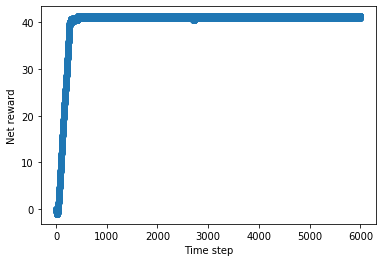

In [9]:
plt.scatter(*zip(*step_rewards))
plt.xlabel("Time step")
plt.ylabel("Net reward")
plt.show()

It looks like the agent is not gaining any reward after 1000 steps. It fails to reach the goal with the naive strategy.

#### Replay the video

In [10]:
video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="128" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))